# Wine clustering

1. **Alcohol**: O percentual de etanol no vinho, usualmente medido por volume (por exemplo, 12%).
2. **Malic acid**: Um ácido naturalmente ocorrente nos uvas, frequentemente usado como medida da acidez do vinho.
3. **Ash**: A resíduo inorgânico deixado após queimar o vinho, que pode indicar a presença de minerais como potássio, cálcio e magnésio.
4. **Alcalinity of ash**: Uma medida das propriedades alcalinas do resíduo, que pode estar relacionada à presença de minerais como cálcio e magnésio.
5. **Magnesium**: Um elemento mineral encontrado no vinho, que pode afetar seu sabor e aroma.
6. **Total phenols**: Uma medida do total de compostos fenólicos, que são um tipo de antioxidante encontrado no vinho.
7. **Flavanoids**: Um tipo específico de composto fenólico encontrado no vinho, que pode contribuir para seu sabor, aroma e cor.
8. **Nonflavanoid phenols**: Outro tipo de composto fenólico encontrado no vinho, que também pode afetar seu sabor, aroma e cor.
9. **Proanthocyanins**: Um tipo de flavonóide encontrado no vinho, que pode contribuir para sua astringência e amargor.
10. **Color intensity**: Uma medida da intensidade da cor do vinho, usualmente medida usando um espectrofotômetro.
11. **Hue**: Uma medida da cor do vinho, usualmente medida em graus (por exemplo, 50-60°).
12. **OD280/OD315 of diluted wines**: Uma medida da absorção do vinho diluído em comprimentos de onda específicos (280 e 315 nanômetros). Isso pode indicar a presença de certos compostos, como antocianinas.
13. **Proline**: Um aminoácido encontrado no vinho, que pode afetar seu sabor e aroma.

## bibliotecas

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


## dados

In [2]:
df=pd.read_csv('wine.csv', sep=',', encoding='iso 8859-1')
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## analise exploratoria

In [4]:
# verificando a quantidade de linhas e colunas
df.shape

(178, 13)

In [5]:
# verificando os tipos de dados
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [6]:
# verificando valores ausentes
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [8]:
# verificando valores duplicados
df.duplicated().any()

False

In [9]:
# verificando informações gerais do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [12]:
# analise estatística descritiva
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [25]:
# verificando normalidade dos dados 

for col in df.columns:
    stat, p = stats.shapiro(df[col])
    print(col)
    print("Estatística de Shapiro-Wilk:", stat)
    print("Valor-p:", p)

    if p < 0.05:
        print("Os dados não são normalmente distribuídos.\n")
    else:
        print("Os dados são normalmente distribuídos.\n")



Alcohol
Estatística de Shapiro-Wilk: 0.9818041416927711
Valor-p: 0.020047981728854945
Os dados não são normalmente distribuídos.

Malic_Acid
Estatística de Shapiro-Wilk: 0.8887839752895415
Valor-p: 2.945800703600761e-10
Os dados não são normalmente distribuídos.

Ash
Estatística de Shapiro-Wilk: 0.9839469382497583
Valor-p: 0.0386827755407432
Os dados não são normalmente distribuídos.

Ash_Alcanity
Estatística de Shapiro-Wilk: 0.9902253552856983
Valor-p: 0.263868844753376
Os dados são normalmente distribuídos.

Magnesium
Estatística de Shapiro-Wilk: 0.9383312109016513
Valor-p: 6.345693783266514e-07
Os dados não são normalmente distribuídos.

Total_Phenols
Estatística de Shapiro-Wilk: 0.9766817428672644
Valor-p: 0.004395305154289821
Os dados não são normalmente distribuídos.

Flavanoids
Estatística de Shapiro-Wilk: 0.9545261281841189
Valor-p: 1.6788526899512583e-05
Os dados não são normalmente distribuídos.

Nonflavanoid_Phenols
Estatística de Shapiro-Wilk: 0.9625217036845527
Valor-p: 0.

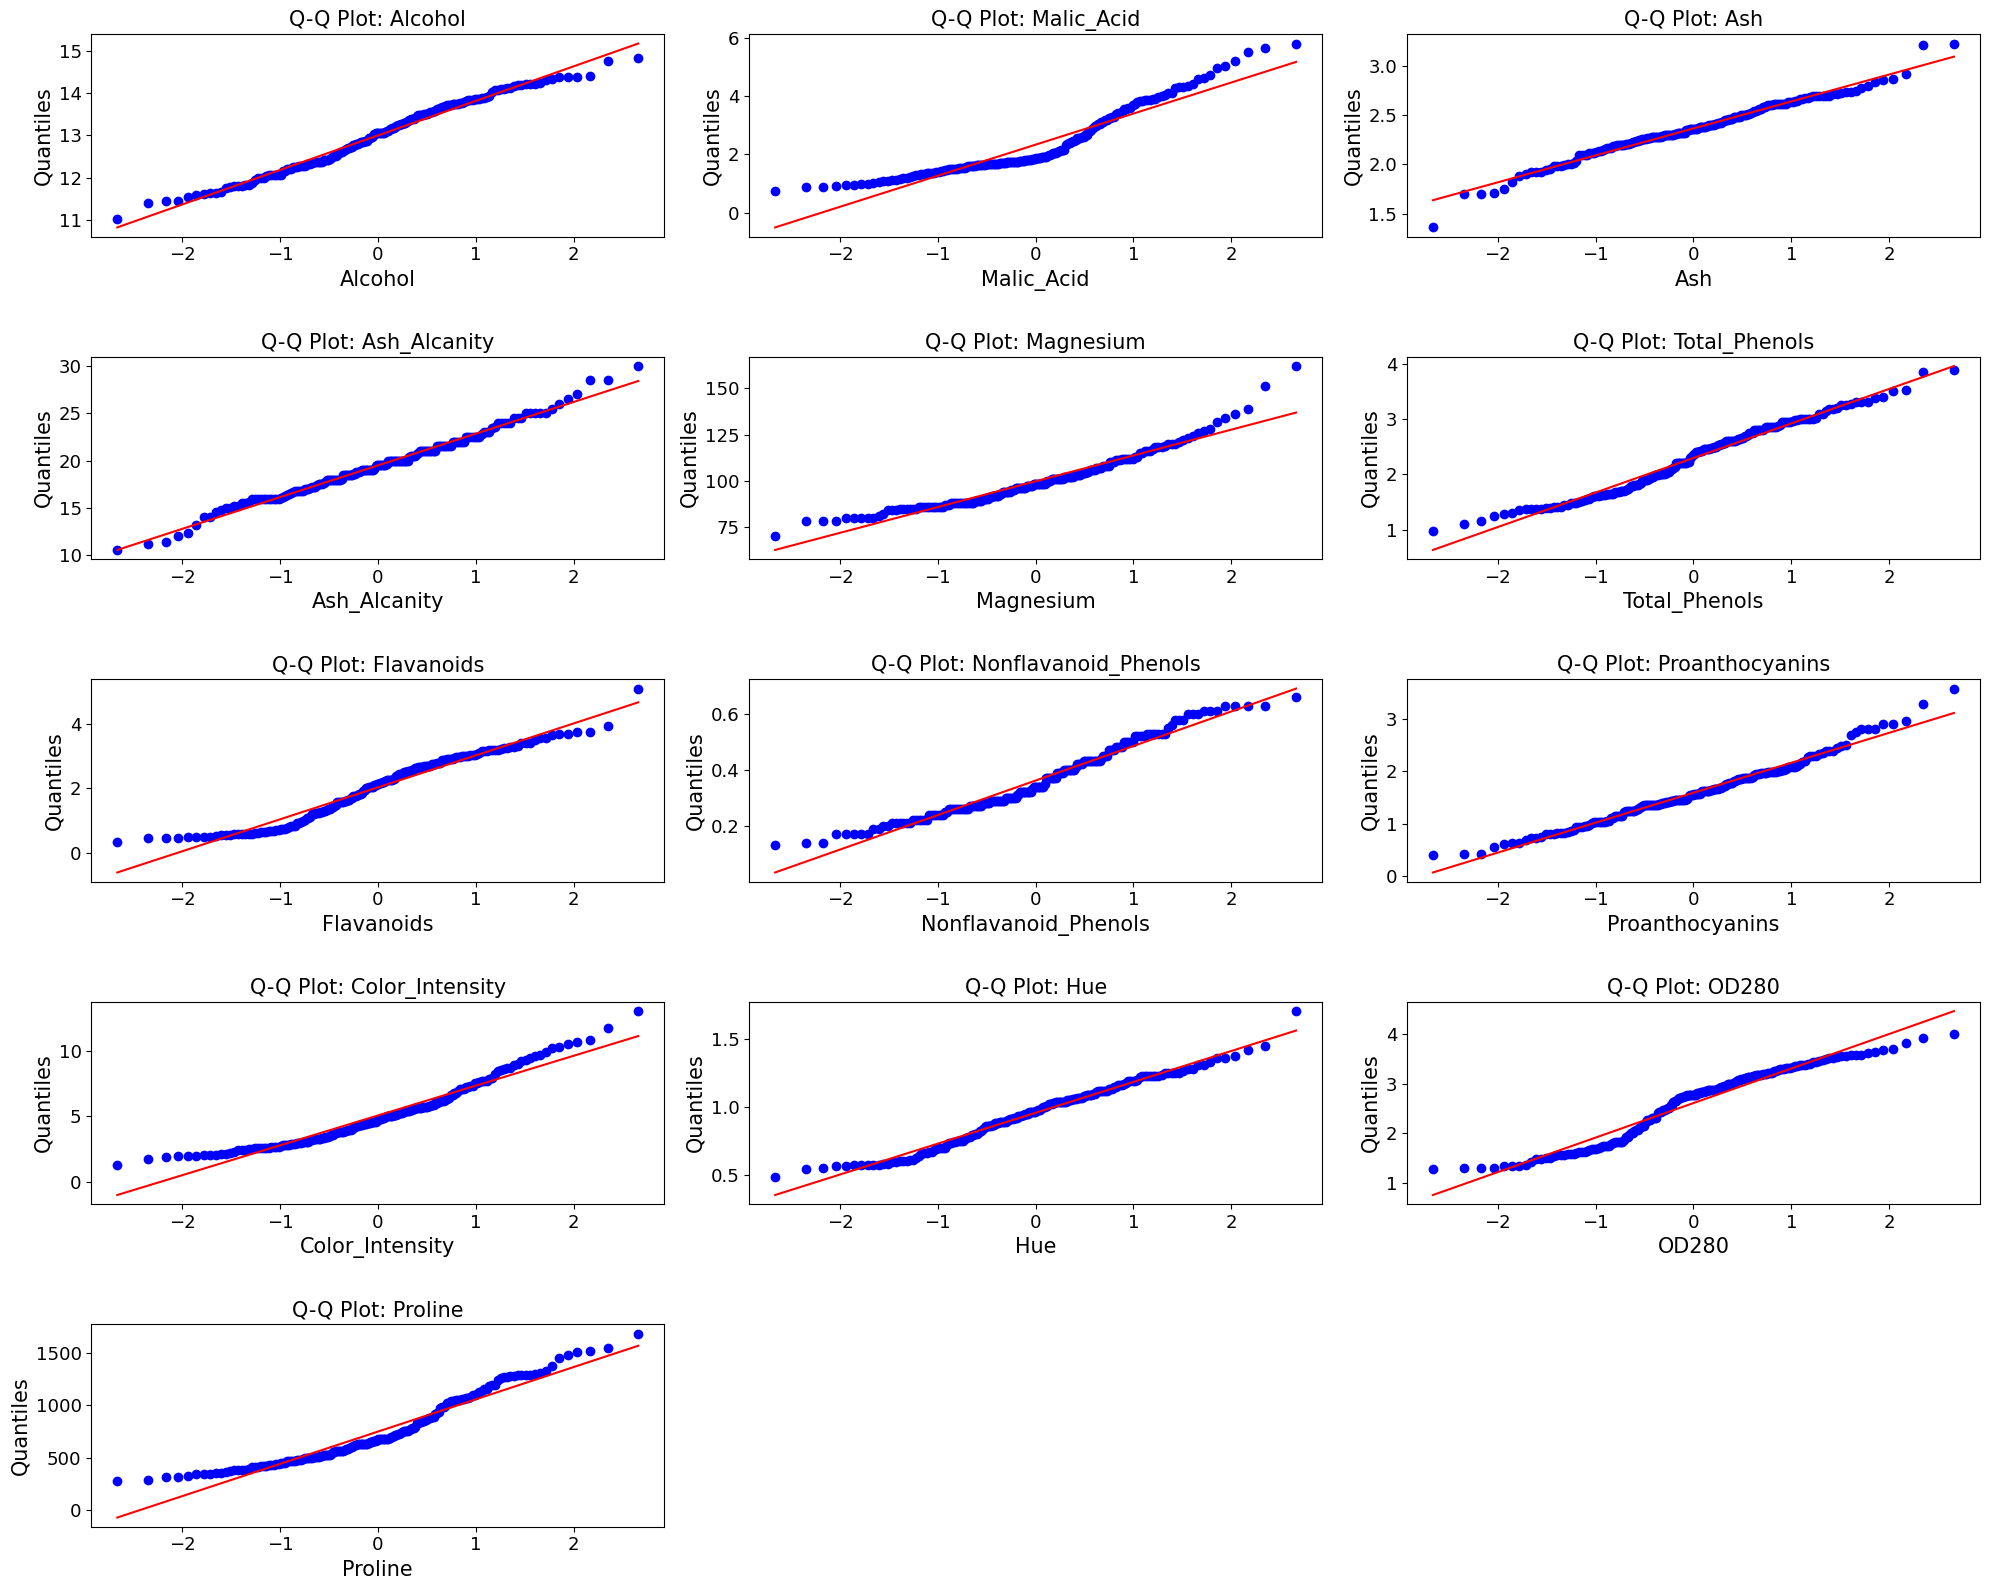

In [34]:
# verificando a nominalidade dos dados
plt.figure(figsize = (20,16))
for i,col in enumerate(df):
    plt.subplot(5,3,i+1)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot: {col}",fontsize = 15)
    plt.xlabel(f"{col}",fontsize = 15)
    plt.ylabel("Quantiles",fontsize = 15)
    plt.tick_params(axis='both', labelsize=13)

plt.tight_layout(h_pad = 3)
plt.show()

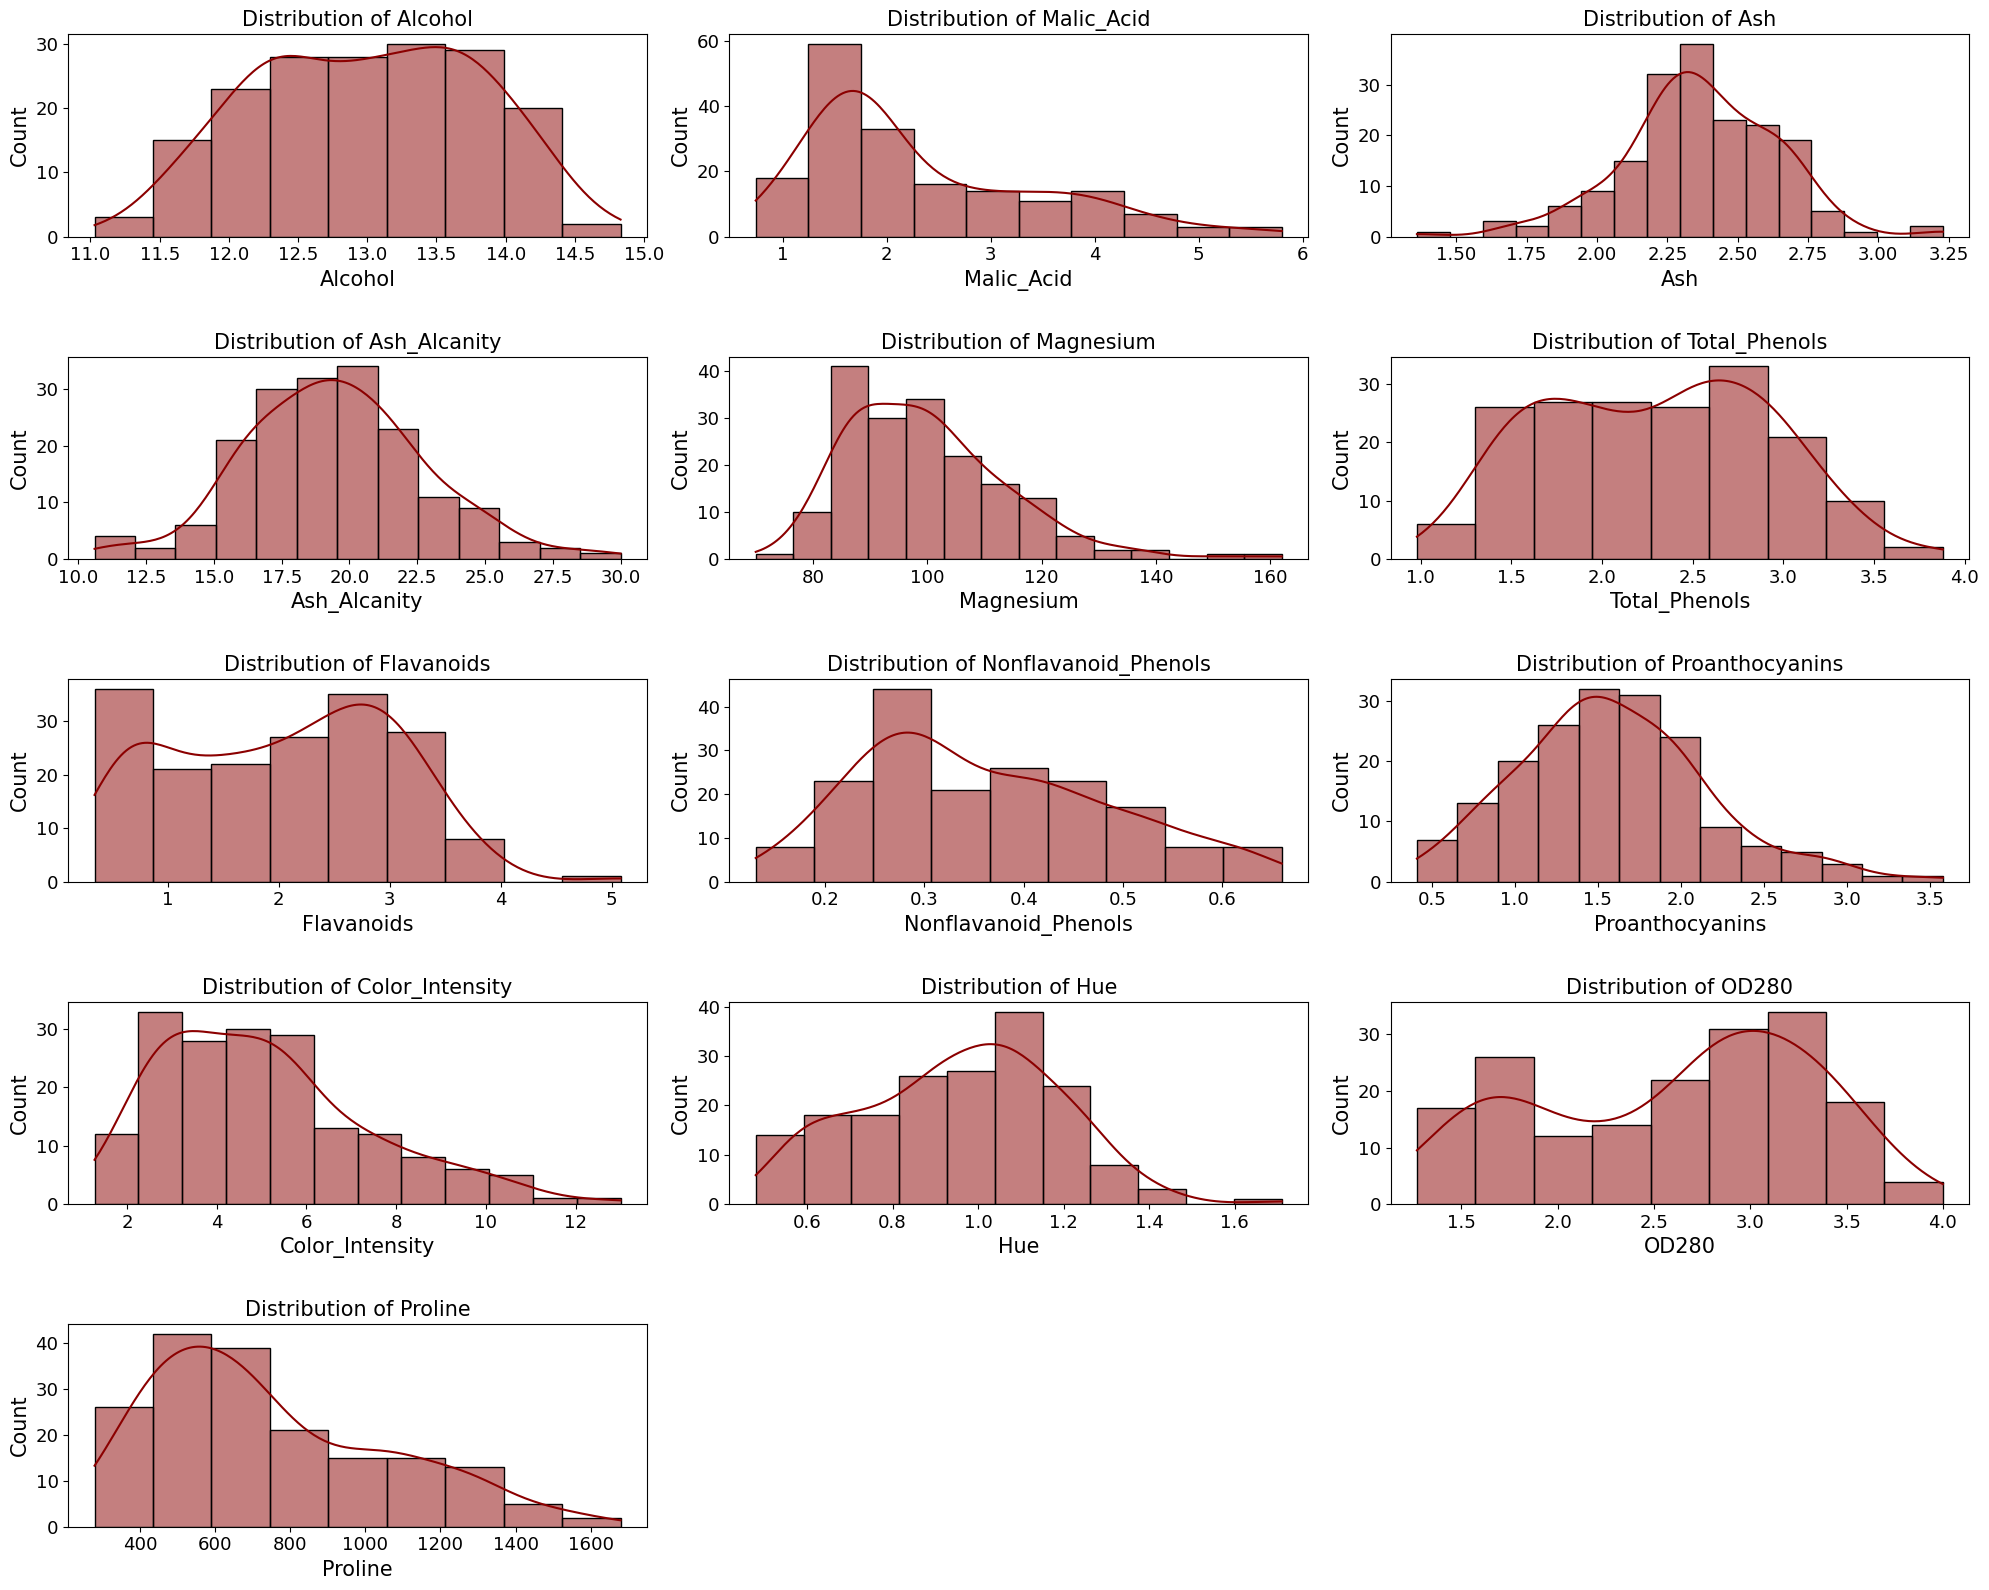

In [15]:
# verificando a frequência de dados por atributo
plt.figure(figsize = (20,16))
for i,col in enumerate(df):
    plt.subplot(5,3,i+1)
    sns.histplot(data = df , x = col , kde = True, color = "Darkred")
    plt.title(f"Distribution of {col}",fontsize = 15)
    plt.xlabel(f"{col}",fontsize = 15)
    plt.ylabel("Count",fontsize = 15)
    plt.tick_params(axis='both', labelsize=13)

plt.tight_layout(h_pad = 3)
plt.show()

In [28]:
# verificando outliers por atributo
def count_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

for col in df.columns:
    print('{} {}'.format(col,len(count_outliers(df, col))))
        

Alcohol 0
Malic_Acid 3
Ash 3
Ash_Alcanity 4
Magnesium 4
Total_Phenols 0
Flavanoids 0
Nonflavanoid_Phenols 0
Proanthocyanins 2
Color_Intensity 4
Hue 1
OD280 0
Proline 0


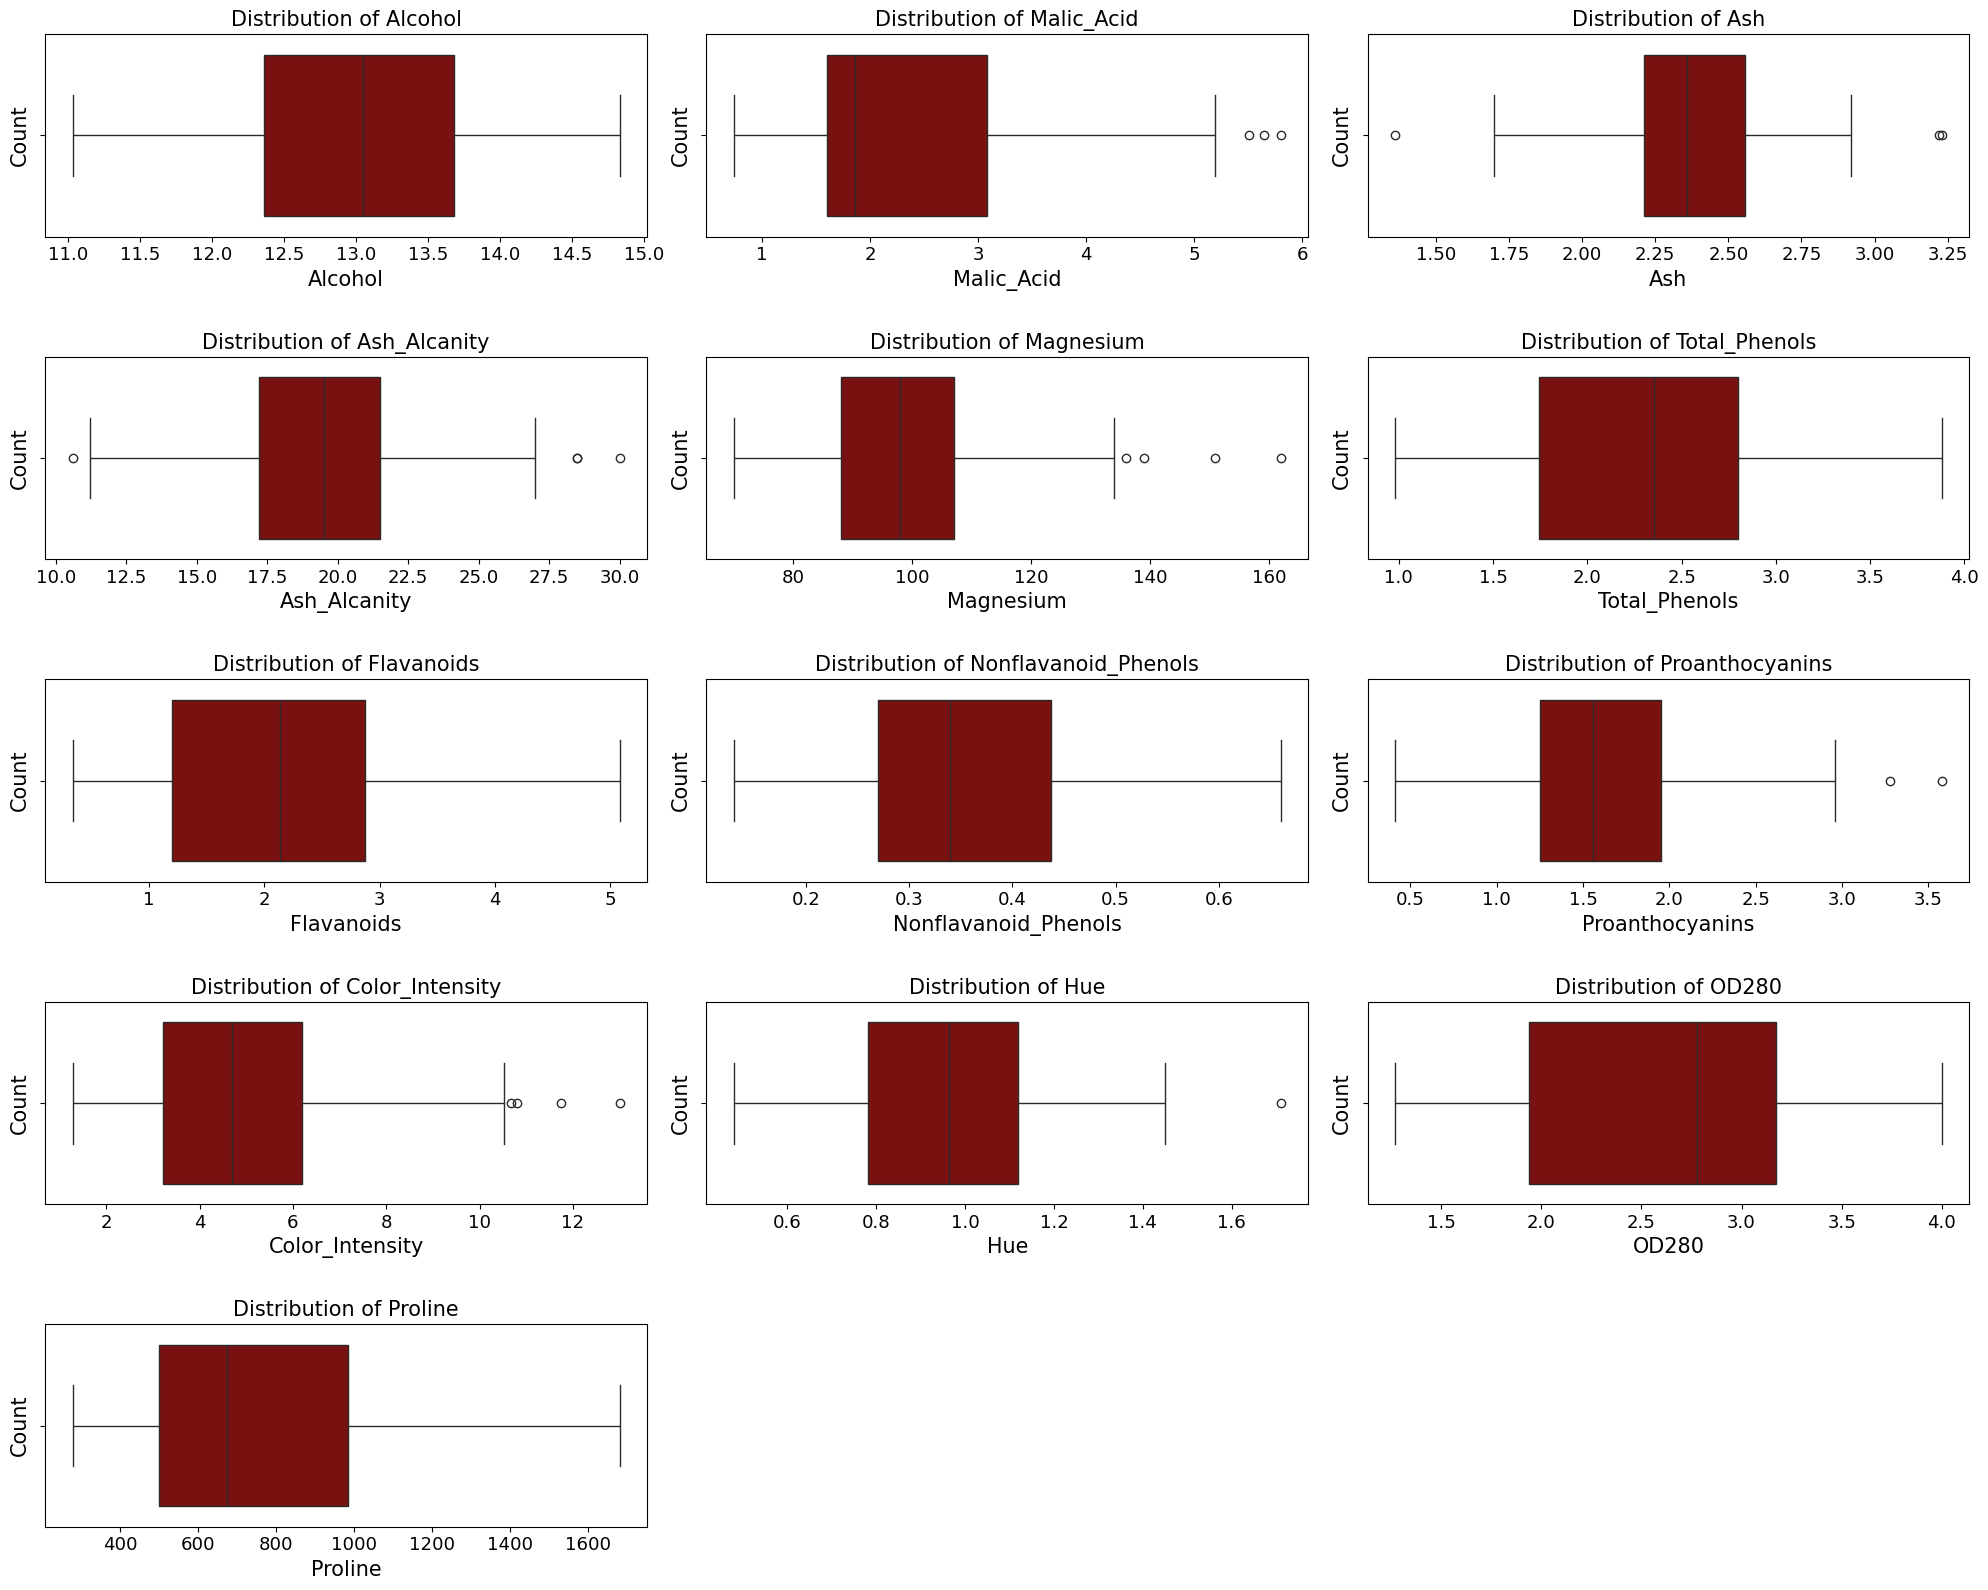

In [29]:
# visualizando os outliers
plt.figure(figsize = (20,16))
for i,col in enumerate(df):
    plt.subplot(5,3,i+1)
    sns.boxplot(data = df , x = col , color = "Darkred")
    plt.title(f"Distribution of {col}",fontsize = 15)
    plt.xlabel(f"{col}",fontsize = 15)
    plt.ylabel("Count",fontsize = 15)
    plt.tick_params(axis='both', labelsize=13)

plt.tight_layout(h_pad = 3)
plt.show()

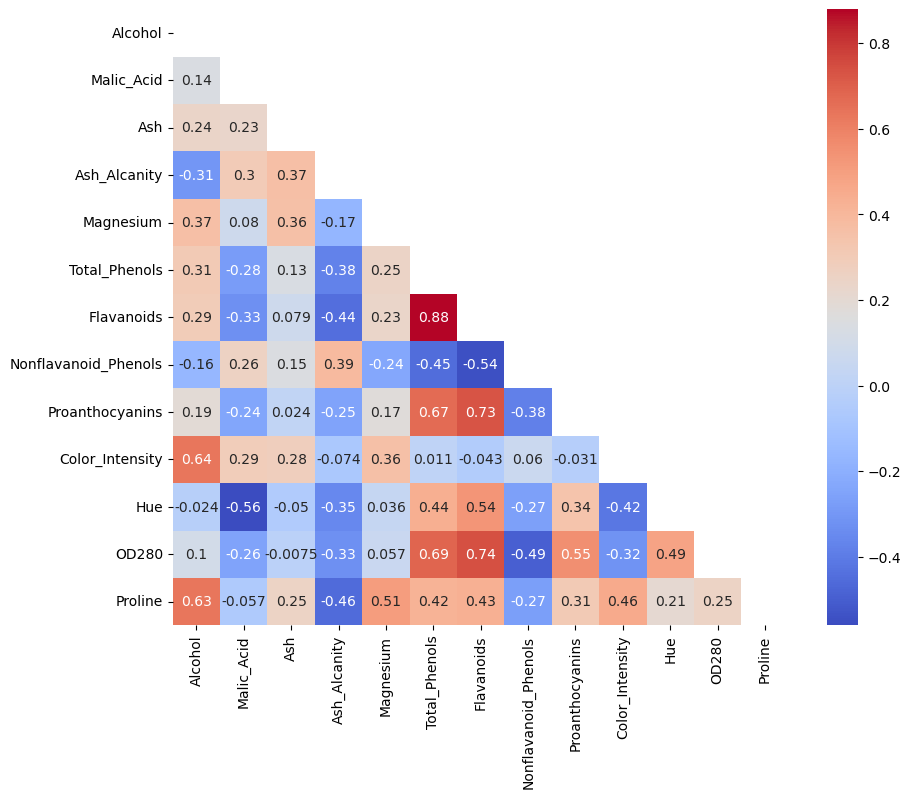

In [45]:
# verificando a correlação entre os atributos
corr_matrix = df.corr(method='spearman') # metodo para distribuição não normal 
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', square=True)
plt.show()

In [68]:
# verificando as 10 correlações mais altas
correlacoes_filtradas = corr_matrix.abs().unstack().sort_values(ascending = False).drop_duplicates().head(10)
correlacoes_filtradas

Proline          Proline            1.000000
Flavanoids       Total_Phenols      0.879404
                 OD280              0.741533
Proanthocyanins  Flavanoids         0.730322
OD280            Total_Phenols      0.687207
Proanthocyanins  Total_Phenols      0.666689
Alcohol          Color_Intensity    0.635425
Proline          Alcohol            0.633580
Hue              Malic_Acid         0.560265
OD280            Proanthocyanins    0.554031
dtype: float64

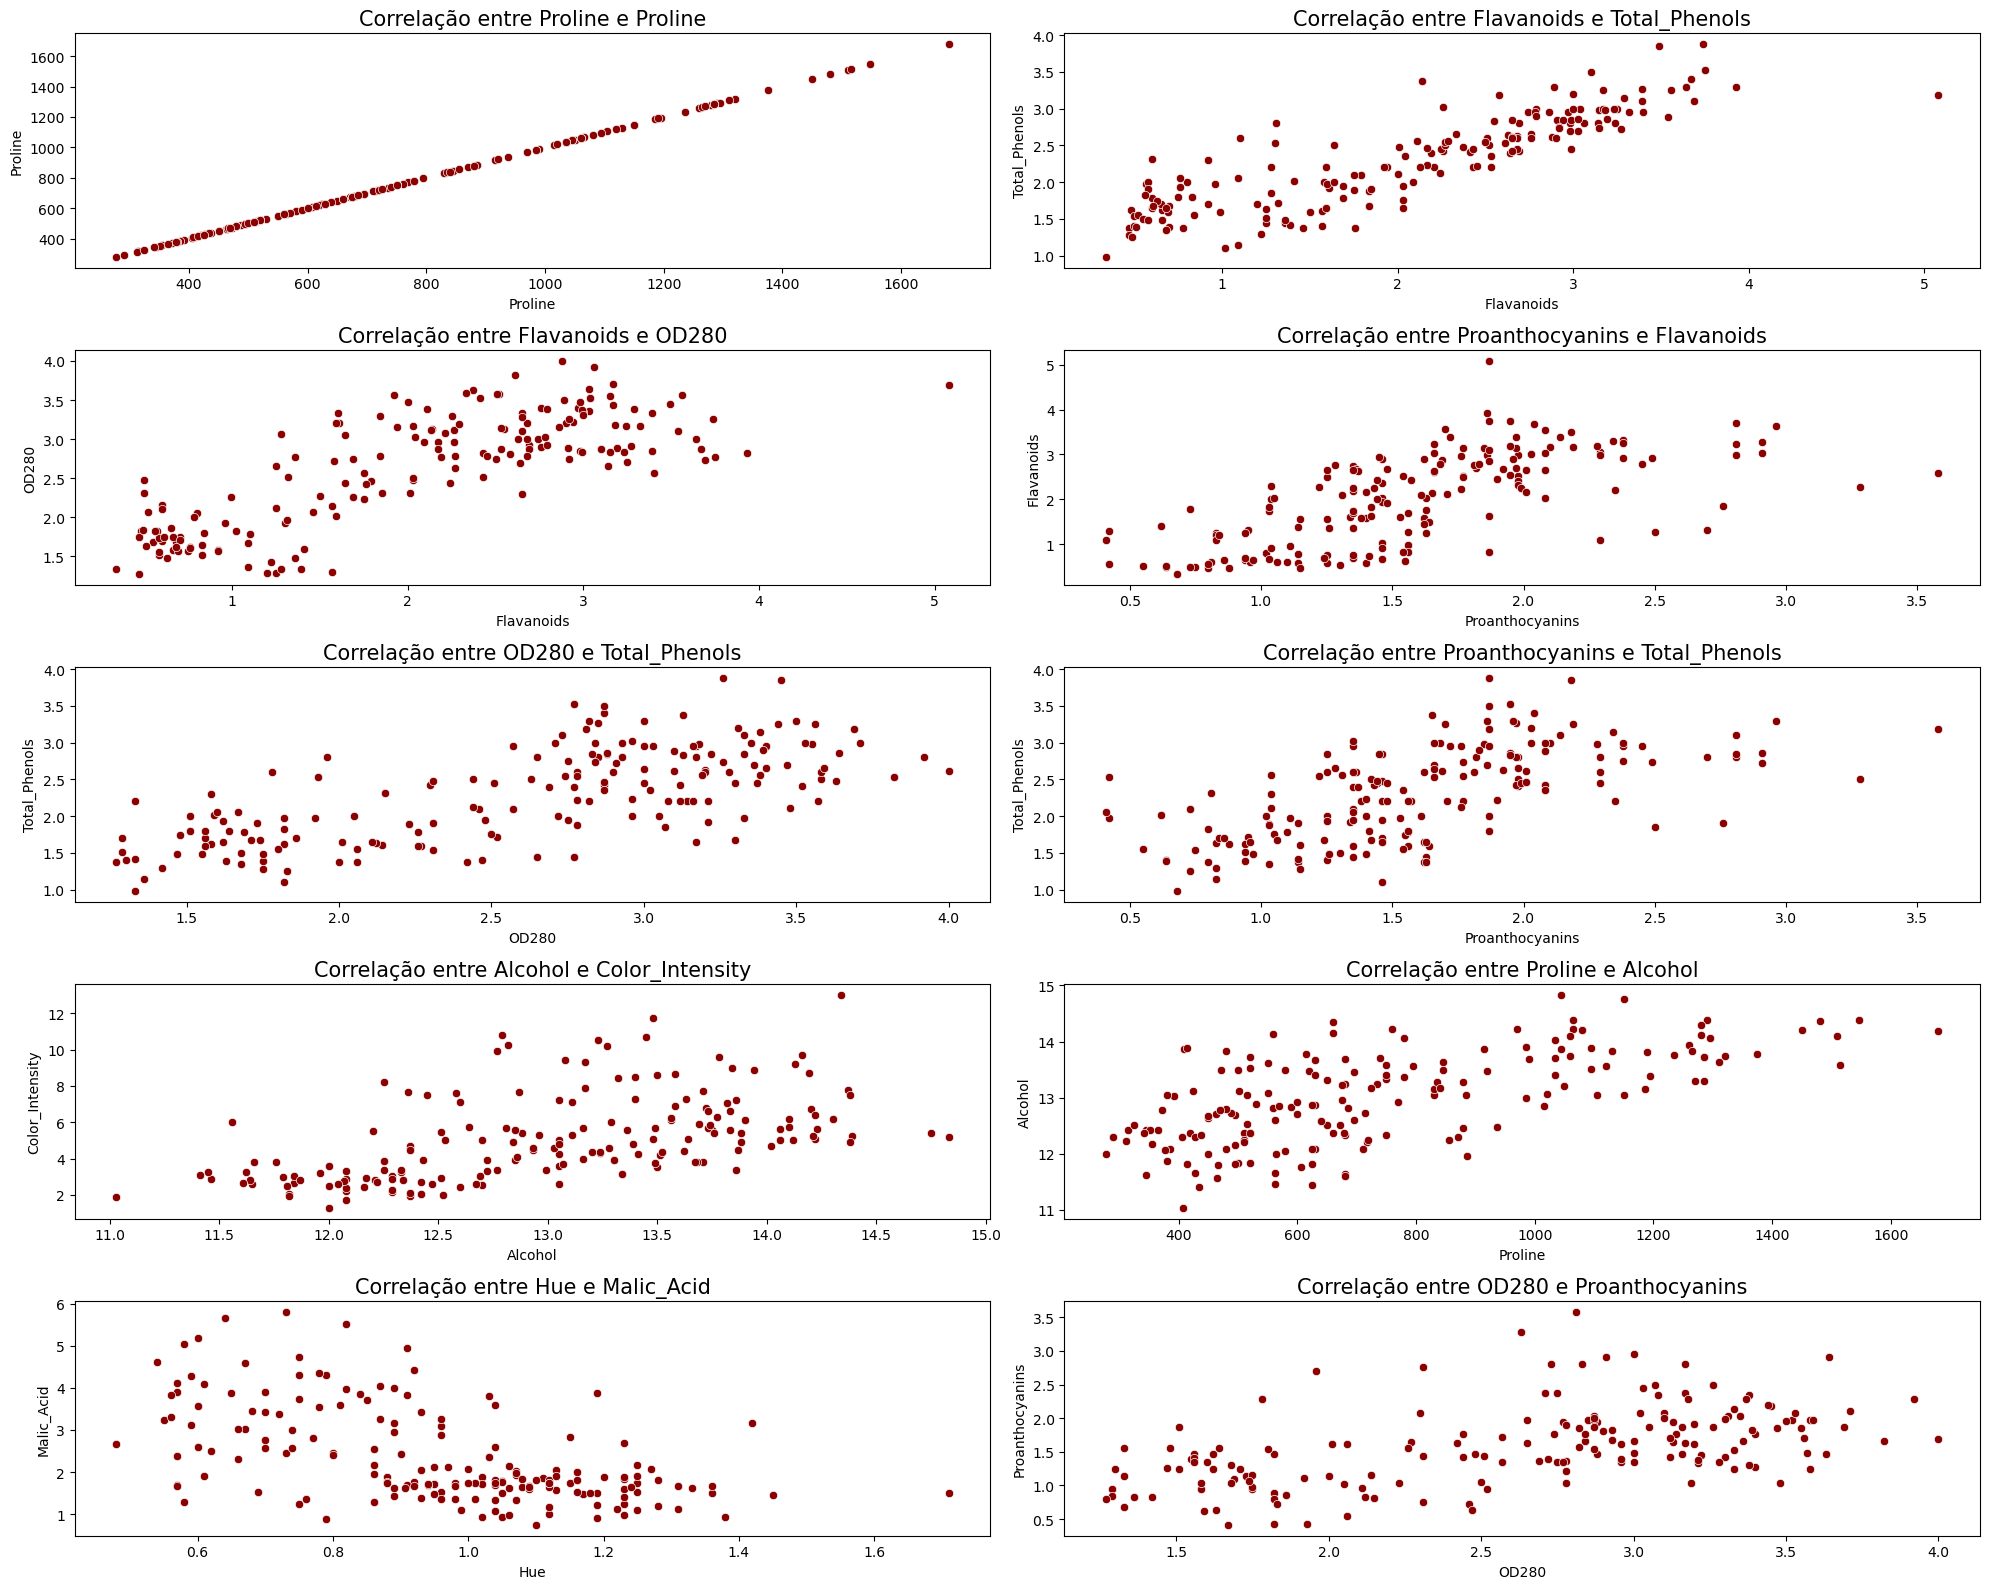

In [71]:
# visualizando as 10 correlações mais altas
plt.figure(figsize=(20,16))
for i,col in enumerate(correlacoes_filtradas.index):
    plt.subplot(5,2,i+1)
    sns.scatterplot(data=df, x=col[0], y=col[1], color="Darkred")
    plt.title(f"Correlação entre {col[0]} e {col[1]}", fontsize=15)

plt.tight_layout()
plt.show()

## pre processamento


In [42]:
# padronizando os dados
scaler = StandardScaler()
X = df.copy()
X_scaled = scaler.fit_transform(X)

In [58]:
# aplicando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [81]:
# dicionário para armazenar resultados
results = {
    "Model": [],
    "Silhouette Score": [],
    "Calinski-Harabasz Score": [],
    "Davies-Bouldin Score": []
}

In [82]:
# função de avaliação com verificação de clusters e ruído
def evaluate_clustering(model_name, X, labels):
    # verificar se há pelo menos 2 clusters válidos (ignorando rótulo -1 de ruído)
    unique_labels = set(labels)
    unique_clusters = unique_labels - {-1}  # remover ruído
    
    if len(unique_clusters) > 1:
        results["Model"].append(model_name)
        results["Silhouette Score"].append(silhouette_score(X, labels))
        results["Calinski-Harabasz Score"].append(calinski_harabasz_score(X, labels))
        results["Davies-Bouldin Score"].append(davies_bouldin_score(X, labels))
    else:
        print(f"O modelo {model_name} não possui clusters suficientes para avaliação.")


## Modelos

### KMeans

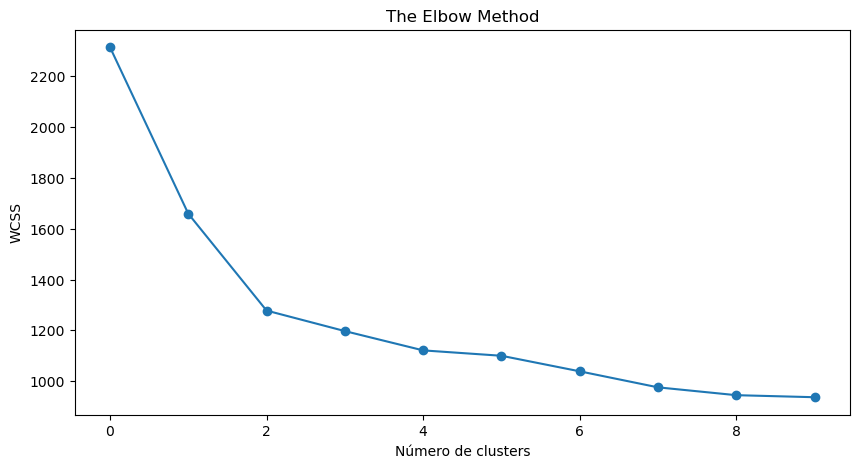

In [45]:
# elbow method kmeans
plt.figure(figsize=(10,5))

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0, max_iter = 300)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

In [83]:
# modelo kmeans
kmeans = KMeans(n_clusters=3, random_state=42, init = 'k-means++')
kmeans_labels = kmeans.fit_predict(X_scaled)
evaluate_clustering("K-Means (k=3)",X_scaled, kmeans_labels)

In [84]:
# modelo kmeans com pca
kmeans = KMeans(n_clusters=3, random_state=42, init = 'k-means++')
kmeans_pca_labels = kmeans.fit_predict(X_pca)
evaluate_clustering("K-Means (k=3) com PCA",X_pca, kmeans_pca_labels)

### agrupamento hierárquico

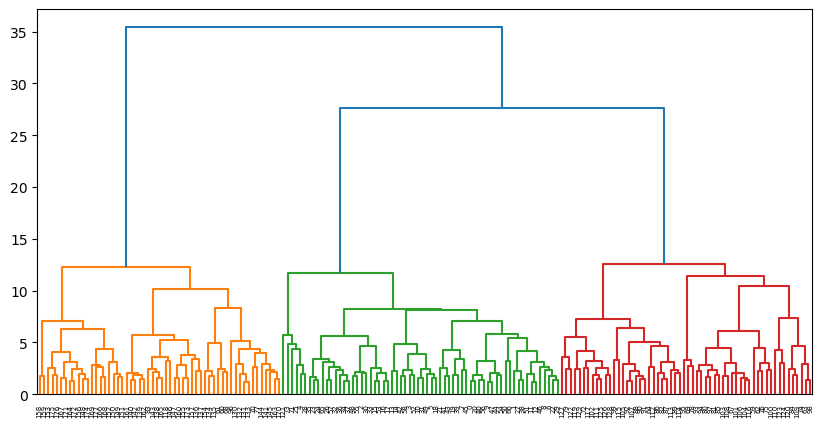

In [47]:
# dendograma
plt.figure(figsize=(10,5))
dendrogram(linkage(X_scaled, method='ward'))
plt.show()

In [85]:
# modelo agrupamento hierárquico
hierarchical = AgglomerativeClustering(n_clusters = 3, metric='euclidean', linkage = 'ward')
hierarchical_labels = hierarchical.fit_predict(X_scaled)
evaluate_clustering("Hierarchical (k=3)",X_scaled, hierarchical_labels)

In [86]:
# modelo agrupamento hierárquico com pca    
hierarchical = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hierarchical_pca_labels = hierarchical.fit_predict(X_pca)     
evaluate_clustering("Hierarchical (k=3) com PCA",X_pca, hierarchical_pca_labels)

### DBSCAN

In [87]:
# modelo dbscan
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

if len(set(dbscan_labels)) > 1:
    evaluate_clustering("DBSCAN (eps=2, min_samples=5)", X_scaled, dbscan_labels)

In [88]:
# modelo dbscan com pca
dbscan = DBSCAN(eps=1.5, min_samples=4)
dbscan_pca_labels = dbscan.fit_predict(X_pca)

if len(set(dbscan_labels)) > 1:
    evaluate_clustering("DBSCAN (eps=1.5, min_samples=4) com PCA", X_pca, dbscan_pca_labels)

O modelo DBSCAN (eps=1.5, min_samples=4) com PCA não possui clusters suficientes para avaliação.


### meanshift

In [89]:
# modelo com mean shift
mean_shift = MeanShift(bandwidth=3.5, cluster_all=True)
mean_shift_labels = mean_shift.fit_predict(X_scaled)
evaluate_clustering("Mean Shift",X_scaled, mean_shift_labels)

In [90]:
# modelo mean shift com pca
mean_shift_pca = MeanShift()
mean_shift_pca_labels = mean_shift_pca.fit_predict(X_pca)
evaluate_clustering("Mean Shift (PCA)", X_pca,mean_shift_pca_labels)

## metricas e escolha de algoritimo

In [91]:
# criar um DataFrame com os resultados
results_df = pd.DataFrame(results)
results_df.sort_values(by="Silhouette Score", ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)
results_df

,Model,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
0,K-Means (k=3) com PCA,0.560170,343.949210,0.597723
1,Mean Shift (PCA),0.559163,343.826963,0.597568
2,Hierarchical (k=3) com PCA,0.559088,341.058245,0.601336
3,K-Means (k=3),0.284859,70.940008,1.389188
4,Hierarchical (k=3),0.277444,67.647468,1.418592
5,Mean Shift,0.190785,20.179397,1.157626
6,"DBSCAN (eps=2, min_samples=5)",-0.032906,9.755649,2.105327


**K-Means (k=3) com PCA** obteve os melhores valores nas métricas de Silhouette Score e Davies-Bouldin Score, indicando clusters bem compactados e separados.

**Mean Shift (PCA) e Agrupamento Hierárquico (PCA)** também apresentaram resultados muito próximos aos do K-Means após a aplicação do PCA.


In [96]:
# adicionando a coluna de clusters
df_final = pd.concat(
    [df, 
     pd.Series(kmeans_pca_labels, name='kmeans'), 
     pd.Series(mean_shift_pca_labels, name='meanshift'), 
     pd.Series(hierarchical_pca_labels, name='hierarchical')], axis=1)

df_final

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,kmeans,meanshift,hierarchical
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2,1,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2,1,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2,1,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2,1,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1,2,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1,2,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1,2,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1,2,1


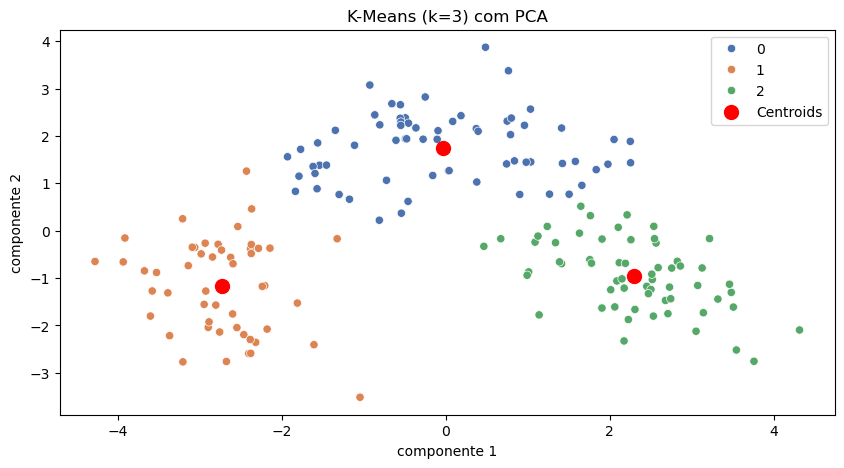

In [105]:
# visualizando os clusters com kmeans
plt.figure(figsize=(10,5))
sns.scatterplot(data=pd.DataFrame(X_pca), x=X_pca[:,0], y=X_pca[:,1], hue=kmeans_pca_labels, palette='deep')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label = 'Centroids')
plt.title("K-Means (k=3) com PCA")
plt.ylabel('componente 2')
plt.xlabel('componente 1')
plt.legend()
plt.show()

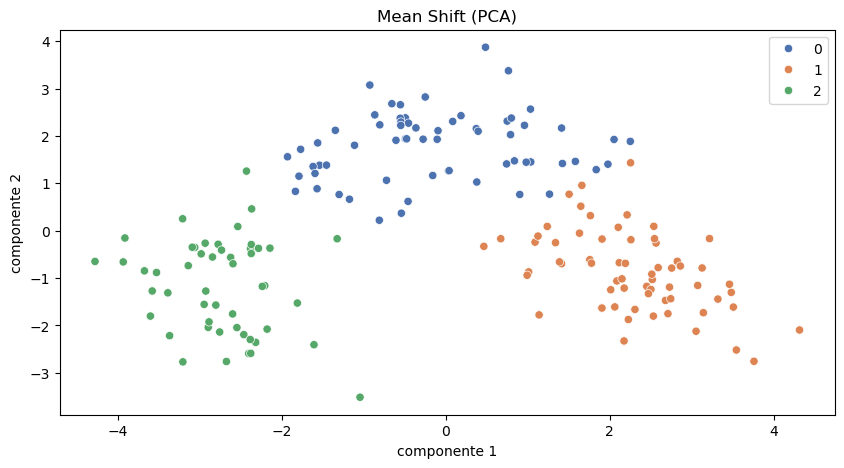

In [106]:
# visualizando os clusters com mean shift
plt.figure(figsize=(10,5))
sns.scatterplot(data=pd.DataFrame(X_pca), x=X_pca[:,0], y=X_pca[:,1], hue=mean_shift_pca_labels, palette='deep')
plt.title("Mean Shift (PCA)")
plt.ylabel('componente 2')
plt.xlabel('componente 1')
plt.legend()
plt.show()

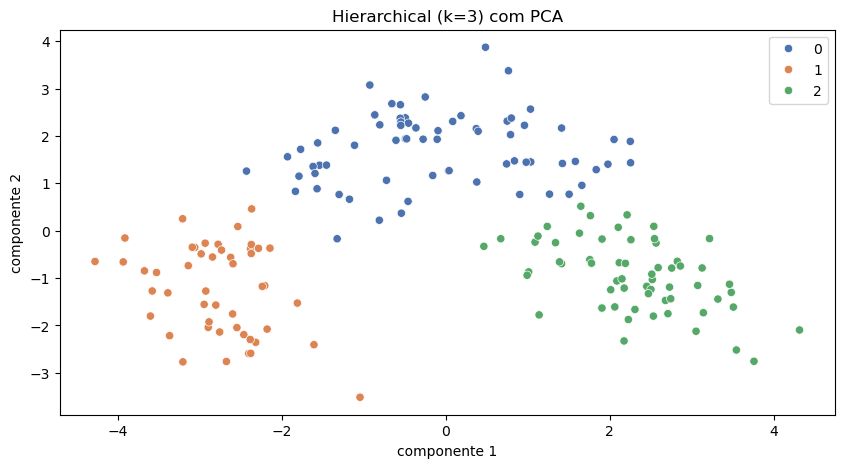

In [107]:
# visualizando os clusters com hierarchical
plt.figure(figsize=(10,5))
sns.scatterplot(data=pd.DataFrame(X_pca), x=X_pca[:,0], y=X_pca[:,1], hue=hierarchical_pca_labels, palette='deep')
plt.title("Hierarchical (k=3) com PCA")
plt.ylabel('componente 2')
plt.xlabel('componente 1')
plt.legend()
plt.show()

## salvando modelos 

In [108]:
import pickle

pickle.dump(kmeans, open('kmeans_pca.pkl', 'wb'))
pickle.dump(mean_shift, open('mean_shift_pca.pkl', 'wb'))
pickle.dump(hierarchical, open('hierarchical_pca.pkl', 'wb'))